In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_aod_terra2010 = pd.read_csv('MOD043ktemporal_serie_manaus_aod2010_2020.csv', sep=';')
df_aod_aqua2010 = pd.read_csv('MYD043ktemporal_serie_manaus_aod2010_2020.csv', sep=';')
df_aod_terra2010 = df_aod_terra2010.dropna()
df_aod_aqua2010 = df_aod_aqua2010.dropna()
print('TERRA2010:', len(df_aod_terra2010))
print('AQUA2010:', len(df_aod_aqua2010))
df_aod_terra2021 = pd.read_csv('MOD043ktemporal_serie_manaus_aod2021_2022.csv', sep=';')
df_aod_aqua2021 = pd.read_csv('MYD043ktemporal_serie_manaus_aod2021_2022.csv', sep=';')
df_aod_terra2021 = df_aod_terra2021.dropna()
df_aod_aqua2021 = df_aod_aqua2021.dropna()
print('TERRA2021:', len(df_aod_terra2021))
print('AQUA2021:', len(df_aod_aqua2021))


TERRA2010: 1427
AQUA2010: 1567
TERRA2021: 230
AQUA2021: 236


In [3]:
df_aod_terra2010 = df_aod_terra2010[df_aod_terra2010["AOD"] <= 5]
df_aod_terra2010 = df_aod_terra2010[df_aod_terra2010["AOD"] >= 0]
df_aod_terra2010['date'] = pd.to_datetime(df_aod_terra2010['date'])

df_aod_aqua2010 = df_aod_aqua2010[df_aod_aqua2010["AOD"] <= 5]
df_aod_aqua2010 = df_aod_aqua2010[df_aod_aqua2010["AOD"] >= 0]
df_aod_aqua2010['date'] = pd.to_datetime(df_aod_aqua2010['date'])
df_aod_aqua2010


,date,AOD
33,2010-01-06,0.135101
55,2010-01-10,0.247000
84,2010-01-13,0.137000
112,2010-01-18,0.416500
117,2010-01-19,0.196571
...,...,...
25619,2020-12-03,0.554150
25620,2020-12-05,0.438926
25646,2020-12-26,0.256667
25658,2020-12-28,0.397833


In [4]:
df_aod_terra2021 = df_aod_terra2021[df_aod_terra2021["AOD"] <= 5]
df_aod_terra2021 = df_aod_terra2021[df_aod_terra2021["AOD"] >= 0]
df_aod_terra2021['date'] = pd.to_datetime(df_aod_terra2021['date'])

df_aod_aqua2021 = df_aod_aqua2021[df_aod_aqua2021["AOD"] <= 5]
df_aod_aqua2021 = df_aod_aqua2021[df_aod_aqua2021["AOD"] >= 0]
df_aod_aqua2021['date'] = pd.to_datetime(df_aod_aqua2021['date'])
df_aod_terra2021

,date,AOD
2,2022-09-06,0.501136
3,2021-09-23,0.658500
4,2021-08-11,0.516057
5,2022-04-28,0.178500
10,2021-03-16,0.197714
...,...,...
898,2022-09-27,0.363800
900,2021-07-17,0.131857
903,2022-09-22,0.432441
904,2021-09-12,0.277561


In [5]:
_df2010 = pd.merge(df_aod_aqua2010, df_aod_terra2010, on='date', how='outer').sort_values(by='date', ascending=True).fillna(0)
_df2010['mean'] = _df2010.apply(lambda row: row['AOD_x'] if row['AOD_y'] == 0 else
                                    row['AOD_y'] if row['AOD_x'] == 0 else
                                    (row['AOD_x'] + row['AOD_y']) / 2, axis=1)

_df2010

,date,AOD_x,AOD_y,mean
0,2010-01-06,0.135101,0.179625,0.157363
1,2010-01-10,0.247000,0.472000,0.359500
2,2010-01-13,0.137000,0.000000,0.137000
1575,2010-01-14,0.000000,0.215000,0.215000
3,2010-01-18,0.416500,0.000000,0.416500
...,...,...,...,...
2156,2020-12-21,0.000000,0.381000,0.381000
1569,2020-12-23,0.302000,0.000000,0.302000
1572,2020-12-26,0.256667,0.000000,0.256667
1573,2020-12-28,0.397833,0.000000,0.397833


In [6]:
_df2021 = pd.merge(df_aod_aqua2021, df_aod_terra2021, on='date', how='outer').sort_values(by='date', ascending=True).fillna(0)
_df2021['mean'] = _df2021.apply(lambda row: row['AOD_x'] if row['AOD_y'] == 0 else
                                    row['AOD_y'] if row['AOD_x'] == 0 else
                                    (row['AOD_x'] + row['AOD_y']) / 2, axis=1)

_df2021

,date,AOD_x,AOD_y,mean
243,2021-01-01,0.000000,0.142545,0.142545
97,2021-01-02,0.201786,0.000000,0.201786
227,2021-01-06,0.599833,0.000000,0.599833
190,2021-01-11,0.309600,0.000000,0.309600
68,2021-01-13,0.260000,0.000000,0.260000
...,...,...,...,...
154,2022-12-16,0.426000,0.158000,0.292000
176,2022-12-17,0.306667,0.000000,0.306667
175,2022-12-18,0.251800,0.168985,0.210392
279,2022-12-23,0.000000,0.197000,0.197000


In [7]:
df2010_2022 = pd.concat([_df2010, _df2021], ignore_index=True)
df2010_2022

,date,AOD_x,AOD_y,mean
0,2010-01-06,0.135101,0.179625,0.157363
1,2010-01-10,0.247000,0.472000,0.359500
2,2010-01-13,0.137000,0.000000,0.137000
3,2010-01-14,0.000000,0.215000,0.215000
4,2010-01-18,0.416500,0.000000,0.416500
...,...,...,...,...
2503,2022-12-16,0.426000,0.158000,0.292000
2504,2022-12-17,0.306667,0.000000,0.306667
2505,2022-12-18,0.251800,0.168985,0.210392
2506,2022-12-23,0.000000,0.197000,0.197000


In [8]:
#df2010_2022.to_csv('AOD_manaus_2010_2022_final.csv', index=False)

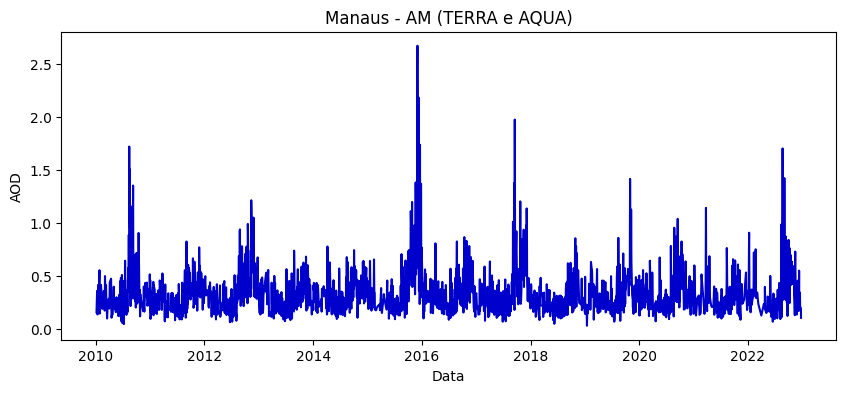

In [12]:
plt.subplots(figsize=(10,4))
sns.lineplot(data=df2010_2022, x="date", y="mean", color = 'mediumblue')
plt.title("Manaus - AM (TERRA e AQUA)")
plt.xlabel("Data")
plt.ylabel("AOD")
#plt.savefig("time_serie_aod_manaus_terra_e_aqua.png")